In [1]:
import glob
import pandas as pd
import pickle

In [2]:
game_files = glob.glob('../data/complex_evaluation/*.pkl')

In [3]:
games = []
for game_file in game_files:
    with open(game_file, 'rb') as file:
        game = pickle.load(file)
        game['id'] = int(game_file.split('/')[-1].split('.')[0].split('_')[-1])
        games.append(game)

In [5]:
games[0]

{'bet_history': [('Bob', 1, 'Small Blind', 'Pre-flop'),
  ('Charlie', 2, 'Big Blind', 'Pre-flop')],
 'reasoning_history': [('Alice',
   'I will call the current bet of 2 as my hand has potential with a high card and a queen. Since the community cards are still empty, I want to see the next cards before making any aggressive moves.',
   'Pre-flop'),
  ('Alice',
   'I will raise the current bet to 5. With a Queen and Ace of hearts, I have a strong hand, and the community cards show potential for a flush or straight. I want to increase the pot size and put pressure on my opponents.',
   'Flop'),
  ('Bob',
   "With a pair of Jacks showing on the board and holding another Jack, there's a potential for a strong hand, making it reasonable to stay in the game by calling. The current bet is 2 chips, which is affordable given my chip count of 9. The hand shows potential without significant aggressive betting from opponents, suggesting a safe call to see the next community card.",
   'Flop'),
  (

In [56]:
games_with_winners = list(filter(lambda x: 'winner' in x.keys(), games))
winning_stats = list(map(lambda x: {'winner': x['winner'], 'winner_role': x['role'], 'model': x['winner_model'], 'winning_amount': x['winning_amount']}, games_with_winners))

In [57]:
len(winning_stats)

75

In [58]:
df_winning_stats = pd.DataFrame(winning_stats)

In [59]:
df_winning_stats.head()

,winner,winner_role,model,winning_amount
0,Alice,Dealer,gpt-3.5-turbo-1106,23
1,Charlie,Small Blind,gpt-4o,17
2,Alice,Big Blind,gpt-3.5-turbo-1106,19
3,Alice,Small Blind,gpt-3.5-turbo-1106,15
4,Alice,Big Blind,gpt-3.5-turbo-1106,19


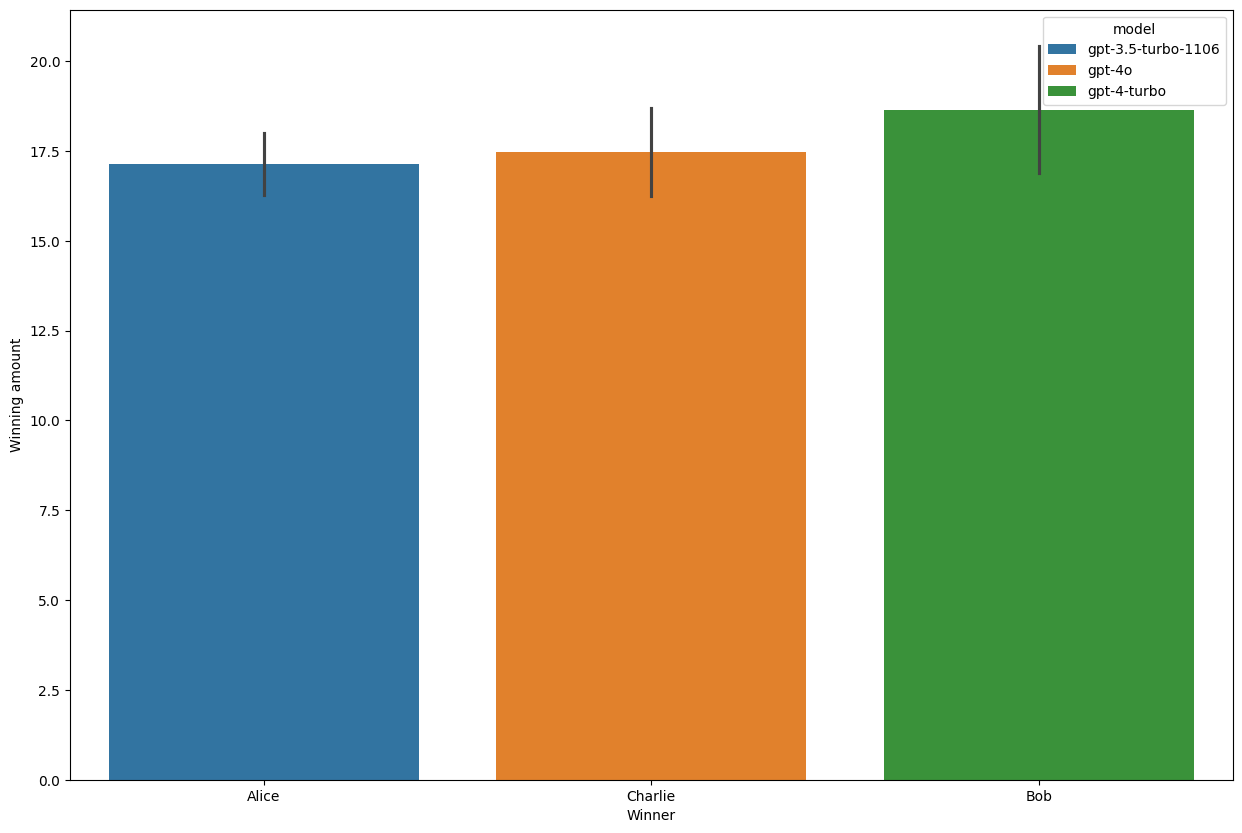

In [60]:
# plot the barchart of victories by model and winner name
import matplotlib.pyplot as plt
import seaborn as sns
# set the size of the plot
plt.figure(figsize=(15, 10))
# set the name of the x-axis
plt.xlabel('Winner')
# set the name of the y-axis
plt.ylabel('Winning amount')
sns.barplot(x='winner', y='winning_amount', hue='model', data=df_winning_stats);


In [61]:
# count the number of victories by model and winner name
df_winning_stats.groupby(['model', 'winner']).size()

model               winner 
gpt-3.5-turbo-1106  Alice      34
gpt-4-turbo         Bob        17
gpt-4o              Charlie    24
dtype: int64

In [62]:
# sum the winning amount by model and winner name
df_winning_stats.groupby(['model', 'winner']).sum()

/tmp/ipykernel_182626/1867170868.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_winning_stats.groupby(['model', 'winner']).sum()


,,winning_amount
model,winner,
gpt-3.5-turbo-1106,Alice,583
gpt-4-turbo,Bob,317
gpt-4o,Charlie,419


In [71]:
# get the average winning amount by model and winner name
df_winning_stats.groupby(['model', 'winner']).mean()

/tmp/ipykernel_182626/736136457.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_winning_stats.groupby(['model', 'winner']).mean()


,,winning_amount
model,winner,
gpt-3.5-turbo-1106,Alice,17.147059
gpt-4-turbo,Bob,18.647059
gpt-4o,Charlie,17.458333


In [63]:
# count the number of victories by role
df_winning_stats.groupby(['winner_role']).size()

winner_role
Big Blind      28
Dealer         24
Small Blind    23
dtype: int64

In [64]:
# sum the winning amount by role
df_winning_stats.groupby(['winner_role']).sum()

/tmp/ipykernel_182626/1299034.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_winning_stats.groupby(['winner_role']).sum()


,winning_amount
winner_role,
Big Blind,462
Dealer,446
Small Blind,411


In [65]:
games_with_errors = list(filter(lambda x: 'errors' in x.keys(), games))
df_games_with_errors = pd.DataFrame(games_with_errors)

In [66]:
df_games_with_errors.head()

,bet_history,reasoning_history,errors,winner,role,winner_model,winning_amount,id
0,"[(Bob, 1, Small Blind, Pre-flop), (Alice, 2, B...","[(Charlie, With a Jack of Hearts and a Six of ...",[Alice doesn't have enough chips to bet 3.],Alice,Big Blind,gpt-3.5-turbo-1106,19,94
1,"[(Charlie, 1, Small Blind, Pre-flop), (Alice, ...","[(Bob, You have a King-high hand with a potent...",[Alice doesn't have enough chips to bet 3.],Alice,Big Blind,gpt-3.5-turbo-1106,15,80
2,"[(Bob, 1, Small Blind, Pre-flop), (Charlie, 2,...","[(Alice, I will call the current bet of 2, as ...",[Alice doesn't have enough chips to bet 3.],Alice,Dealer,gpt-3.5-turbo-1106,19,55
3,"[(Bob, 1, Small Blind, Pre-flop), (Alice, 2, B...","[(Charlie, With a Queen of Hearts and Four of ...",[Alice doesn't have enough chips to bet 3.],Charlie,Dealer,gpt-4o,23,81
4,"[(Bob, 1, Small Blind, Pre-flop), (Charlie, 2,...","[(Alice, I will call the current bet of 2 as m...",[Alice doesn't have enough chips to bet 3.],Alice,Dealer,gpt-3.5-turbo-1106,15,95


In [67]:
errors_concatenated = df_games_with_errors['errors'].apply(pd.Series).stack().reset_index(drop=True)

In [68]:
error_names = list(map(lambda x: x.split()[0], errors_concatenated))

In [69]:
# count the number of errors by error name
errors_count = pd.Series(error_names).value_counts()

In [70]:
errors_count

Alice    7
dtype: int64